<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ideas" data-toc-modified-id="Ideas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ideas</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#PM2.5" data-toc-modified-id="PM2.5-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>PM<sub>2.5</sub></a></span></li><li><span><a href="#Observed-data-from-Noibai-(ISD-data)" data-toc-modified-id="Observed-data-from-Noibai-(ISD-data)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Observed data from Noibai (ISD data)</a></span></li><li><span><a href="#MERRA-2-SLV-group" data-toc-modified-id="MERRA-2-SLV-group-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>MERRA-2 SLV group</a></span></li><li><span><a href="#MERRA-2-FLX-group" data-toc-modified-id="MERRA-2-FLX-group-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>MERRA-2 FLX group</a></span></li></ul></li><li><span><a href="#Concatinate-data" data-toc-modified-id="Concatinate-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Concatinate data</a></span></li><li><span><a href="#Correlation-and-filter-out" data-toc-modified-id="Correlation-and-filter-out-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlation and filter out</a></span><ul class="toc-item"><li><span><a href="#let-get-wind-speed-data-in-different-formats" data-toc-modified-id="let-get-wind-speed-data-in-different-formats-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>let get wind speed data in different formats</a></span></li><li><span><a href="#Chart" data-toc-modified-id="Chart-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Chart</a></span></li></ul></li><li><span><a href="#Nudgets-are-here!" data-toc-modified-id="Nudgets-are-here!-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Nudgets are here!</a></span></li></ul></div>

# Ideas

- select parameters influence concentration of PM<sub>2.5</sub> mostly in transport
- data should be indenpendent to PM<sub>2.5</sub>, and should be a physical entities rather a prepresentation of such data
- I explicitly select data from MERRA-2 groups (SLV: single level, and some from FLX: flux diagnosis)

# Libraries

In [214]:
import warnings
warnings.filterwarnings('ignore')

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (14,6)

In [216]:
import datetime

In [217]:
# plt.rcParamsDefault

- let visit some graph we hare in the previous exercise
 - with observed ground data
 
    <img style="width: 80%" src='img/2020Jul_corr_pm25.png'>

- they are all basic parameter, let use all of them. For wind speeds, we will have more options with MERRA-2

- with SLV groups in MERRA-2 reanalysis 

    <img style="width: 80%" src='img/2020Aug-SLV-PM25.png'>

- FLX group

<img style="width: 80%" src='img/2020Aug-FLX.png'>



select columns:  
    - QV10M 10-meter_specific_humidity  
    - QLML surface_specific_humidity  
    - TQL total_precipitable_liquid_water  
    - FRCAN areal_fraction_of_anvil_showers  
    - HLML surface_layer_height  
    - H1000 height_at_1000_mb  
    - DISPH zero_plane_displacement_height   
    - U2M 2-meter_eastward_wind  
    - V2M 2-meter_northward_wind  
    - U50M eastward_wind_at_50_meters  
    - V50M northward_wind_at_50_meters  
    - U850 eastward_wind_at_850_hPa  
    - V850 northward_wind_at_850_hPa  
    - SPEED surface_wind_speed, m s-1  
    - SPEEDMAX surface_wind_speed, m s-1  

In [218]:
# let build a function to look up the name and unit from netcdf4 file
import netCDF4 as nc

In [219]:
def collect_meta_name():
    meta_name = dict()
    files = ['data/nc4/MERRA2_400.tavg1_2d_slv_Nx.20180722.nc4',
             'data/nc4/MERRA2_400.tavg1_2d_flx_Nx.20180102.nc4',
             'data/nc4/MERRA2_400.tavg1_2d_aer_Nx.20180101.nc4']
    for file in files:
        ds = nc.Dataset(file)
        for k, v in ds.variables.items():
            meta_name[k] = f'{v.long_name}, {v.units}'
    return meta_name

In [220]:
name_ = collect_meta_name()

In [221]:
def look_kw(kw=None):
    name_ = collect_meta_name()
    
    for k,v in name_.items():
        if kw in v:
            print(k,v)
    return None

In [222]:
look_kw(kw='wind')

U2M 2-meter_eastward_wind, m s-1
V250 northward_wind_at_250_hPa, m s-1
U850 eastward_wind_at_850_hPa, m s-1
V850 northward_wind_at_850_hPa, m s-1
V50M northward_wind_at_50_meters, m s-1
U250 eastward_wind_at_250_hPa, m s-1
V2M 2-meter_northward_wind, m s-1
V10M 10-meter_northward_wind, m s-1
U50M eastward_wind_at_50_meters, m s-1
U10M 10-meter_eastward_wind, m s-1
V500 northward_wind_at_500_hPa, m s-1
U500 eastward_wind_at_500_hPa, m s-1
ULML surface_eastward_wind, m s-1
SPEED surface_wind_speed, m s-1
SPEEDMAX surface_wind_speed, m s-1
VLML surface_northward_wind, m s-1
BCFLUXU Black Carbon column u-wind mass flux, kg m-1 s-1
OCFLUXV Organic Carbon column v-wind mass flux __ENSEMBLE__, kg m-1 s-1
SUFLUXV SO4 column v-wind mass flux __ENSEMBLE__, kg m-1 s-1
SSFLUXU Sea Salt column u-wind mass flux, kg m-1 s-1
DUFLUXV Dust column v-wind mass flux, kg m-1 s-1
DUFLUXU Dust column u-wind mass flux, kg m-1 s-1
SSFLUXV Sea Salt column v-wind mass flux, kg m-1 s-1
SUFLUXU SO4 column u-wind ma

In [223]:
look_kw(kw='plane')

DISPH zero_plane_displacement_height, m
TCZPBL transcom_planetary_boundary_layer_height, m
PBLH planetary_boundary_layer_height, m


In [224]:
look_kw(kw='height')

H250 height_at_250_hPa, m
DISPH zero_plane_displacement_height, m
H1000 height_at_1000_mb, m
H850 height_at_850_hPa, m
H500 height_at_500_hPa, m
TCZPBL transcom_planetary_boundary_layer_height, m
HLML surface_layer_height, m
PBLH planetary_boundary_layer_height, m


# Load data

## PM<sub>2.5</sub>

In [225]:
pm25 = pd.read_csv('data/cleaned_pm25_Hanoi_PM2.5_2018_YTD.csv',
                   parse_dates=['Date (LT)'], 
                   index_col=['Date (LT)'])
pm25.head()

,pm25
Date (LT),
2018-01-01 01:00:00,69.2
2018-01-01 02:00:00,75.5
2018-01-01 03:00:00,90.2
2018-01-01 04:00:00,97.6
2018-01-01 05:00:00,89.1


## Observed data from Noibai (ISD data)

In [226]:
nb = pd.read_csv('data/cleaned_noibai_noaa_isd_2018.csv',
                parse_dates=['DATE'],
                index_col=['DATE'])
nb.head()

,CIG,VIS,TMP,DEW,WD,WS,CLDCR,CLDHT
DATE,,,,,,,,
2018-01-01 00:00:00,1067.0,8000,16.0,12.0,80,1.5,0.7,1067.0
2018-01-01 00:30:00,975.0,8000,16.0,12.0,60,1.5,0.7,975.0
2018-01-01 01:00:00,975.0,7000,16.0,12.0,80,1.5,0.7,975.0
2018-01-01 01:30:00,975.0,7000,17.0,12.0,60,2.1,0.7,975.0
2018-01-01 02:00:00,1006.0,7000,17.0,12.0,80,3.1,0.4,762.0


In [227]:
 # since it use UTC time, convert to the local time (GMT+7)
nb.index = nb.index + datetime.timedelta(hours=7)

## MERRA-2 SLV group

In [228]:
# T2MWET, T2MDEW, T2M, QV10M, PS, TQV, TQL, H1000, DISPH, winds
cols = ['T2MWET', 'T2MDEW', 'T2M', 'QV10M', 'PS', 'TQV', 'TQL', 'H1000', 'DISPH', 'U2M', 'V2M', 'U50M', 'V50M', 'U850', 'V850']

In [229]:
# read and filter out by the column name
slv = pd.read_csv('data/merra2_slv_hanoi_2018.csv',
                 parse_dates=['time'],
                 index_col=['time'])
print(slv.columns)
slv = slv[cols]
slv.head()

Index(['U2M', 'V250', 'TROPT', 'TROPPB', 'T2M', 'TQL', 'T500', 'U850', 'PS',
       'V850', 'H250', 'Q250', 'T2MDEW', 'V50M', 'Q500', 'DISPH', 'H1000',
       'TS', 'T10M', 'TROPPT', 'SLP', 'U250', 'Q850', 'ZLCL', 'TQV', 'V2M',
       'T250', 'TROPQ', 'V10M', 'H850', 'T850', 'U50M', 'U10M', 'TROPPV',
       'H500', 'V500', 'T2MWET', 'U500', 'QV10M'],
      dtype='object')


,T2MWET,T2MDEW,T2M,QV10M,PS,TQV,TQL,H1000,DISPH,U2M,V2M,U50M,V50M,U850,V850
time,,,,,,,,,,,,,,,
2018-01-01 00:00:00,284.03730,284.03317,287.10890,0.007823,100905.08,34.673485,0.008423,164.23969,0.256348,0.023183,0.507052,0.030755,1.167118,-0.678858,6.310610
2018-01-01 01:00:00,283.94345,283.94443,286.79376,0.007823,100865.09,34.909637,0.009235,160.25461,0.256226,0.189619,0.384886,0.424628,0.882620,-0.398818,6.162886
2018-01-01 02:00:00,283.87656,283.87836,286.48932,0.007822,100819.56,35.195385,0.006260,156.44829,0.256226,0.243190,0.296402,0.544786,0.681256,-0.217877,5.993750
2018-01-01 03:00:00,283.76090,283.75630,286.24753,0.007807,100793.71,35.590984,0.003489,154.54437,0.256104,0.195083,0.277474,0.383533,0.620761,-0.217092,5.911840
2018-01-01 04:00:00,283.66614,283.65967,285.96360,0.007804,100791.80,35.827934,0.002314,154.16837,0.255981,0.132475,0.275675,0.213028,0.631371,-0.108732,5.884082


## MERRA-2 FLX group

In [230]:
# - QV10M 10-meter_specific_humidity
# - QLML surface_specific_humidity
# - TQL total_precipitable_liquid_water
# - FRCAN areal_fraction_of_anvil_showers
# - HLML surface_layer_height
# - H1000 height_at_1000_mb
# - DISPH zero_plane_displacement_height
# - HLML surface_layer_height
# - U2M 2-meter_eastward_wind
# - V2M 2-meter_northward_wind
# - U50M eastward_wind_at_50_meters
# - V50M northward_wind_at_50_meters
# - U850 eastward_wind_at_850_hPa
# - V850 northward_wind_at_850_hPa
# - SPEED surface_wind_speed, m s-1
# - SPEEDMAX surface_wind_speed, m s-1
cols = ['QLML','FRCAN', 'HLML',  'SPEED', 'SPEEDMAX', 'RHOA']

In [231]:
# similar to FLX group, select and filter out
flx = pd.read_csv('data/merra2_flx_hanoi_2018.csv',
                 parse_dates=['time'],
                 index_col=['time'])
flx.columns
flx = flx[cols]
flx.head()

,QLML,FRCAN,HLML,SPEED,SPEEDMAX,RHOA
time,,,,,,
2018-01-01 00:00:00+07:00,0.007674,1.000000,63.991585,1.528854,1.593963,1.215108
2018-01-01 01:00:00+07:00,0.007701,1.000000,63.907425,1.449315,1.488964,1.216159
2018-01-01 02:00:00+07:00,0.007720,1.000000,63.832478,1.447317,1.493476,1.217125
2018-01-01 03:00:00+07:00,0.007736,0.993164,63.766266,1.390683,1.483172,1.218085
2018-01-01 04:00:00+07:00,0.007762,0.927490,63.718185,1.352254,1.409146,1.218972


In [232]:
flx.index = flx.index.tz_localize(None)

# Concatinate data


In [233]:
# now will combine each dataframe using merge 
# if we have the same column name for the index, say 'time', pd.concat() can combine a list of dataframe
flx.head()

,QLML,FRCAN,HLML,SPEED,SPEEDMAX,RHOA
time,,,,,,
2018-01-01 00:00:00,0.007674,1.000000,63.991585,1.528854,1.593963,1.215108
2018-01-01 01:00:00,0.007701,1.000000,63.907425,1.449315,1.488964,1.216159
2018-01-01 02:00:00,0.007720,1.000000,63.832478,1.447317,1.493476,1.217125
2018-01-01 03:00:00,0.007736,0.993164,63.766266,1.390683,1.483172,1.218085
2018-01-01 04:00:00,0.007762,0.927490,63.718185,1.352254,1.409146,1.218972


In [234]:
# PM2.5 and SLV group
df = pd.merge(pm25, slv, right_index=True, left_index=True)

In [235]:
# then FLX group to the two previous dfs
df = pd.merge(df, flx, right_index=True, left_index=True, how='left')

In [236]:
# finally data from Noibai Intl Airpot
df = pd.merge(df, nb, right_index=True, left_index=True, how='left')

In [237]:
df.describe()

,pm25,T2MWET,T2MDEW,T2M,QV10M,PS,TQV,TQL,H1000,DISPH,...,SPEEDMAX,RHOA,CIG,VIS,TMP,DEW,WD,WS,CLDCR,CLDHT
count,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,...,8092.000000,8092.000000,5088.000000,7811.000000,7811.000000,7811.000000,7811.000000,7811.000000,5502.000000,5502.000000
mean,40.758736,293.294133,293.293231,296.359950,0.015057,100091.307728,46.593698,0.078603,94.100740,0.283273,...,4.429708,1.166763,4882.208137,178345.484317,24.536039,20.224299,219.991806,3.107528,0.376863,609.800981
std,31.501209,5.838267,5.840456,6.123929,0.004624,728.034422,15.289697,0.082412,63.071034,0.065183,...,1.814446,0.033969,8266.805156,374942.058550,5.522560,6.008754,272.325200,16.012484,0.190057,348.940325
min,0.000000,271.761080,271.669980,275.719970,0.002889,98338.780000,12.691939,0.000000,-62.420760,0.165833,...,0.353847,1.101529,91.000000,550.000000,9.000000,-1.000000,10.000000,0.000000,0.200000,61.000000
25%,19.000000,290.389635,290.387140,292.489165,0.011934,99467.157500,34.854736,0.011534,39.747400,0.221359,...,3.111255,1.139971,610.000000,5000.000000,21.000000,17.000000,70.000000,2.100000,0.200000,305.000000
50%,32.000000,294.918210,294.917055,297.664350,0.015914,100156.612500,46.939671,0.053711,101.305442,0.308167,...,4.308590,1.161659,945.000000,9000.000000,25.000000,22.000000,120.000000,2.600000,0.400000,549.000000
75%,52.000000,297.960532,297.960155,300.581088,0.019105,100572.849000,60.093417,0.118324,137.084377,0.340698,...,5.540783,1.187278,1494.000000,9999.000000,28.000000,25.000000,270.000000,3.600000,0.400000,914.000000
max,323.000000,301.152130,301.144470,309.323800,0.022890,102189.990000,79.528755,0.451294,266.238680,0.353638,...,14.158017,1.276222,22000.000000,999999.000000,39.000000,30.000000,999.000000,999.900000,0.800000,1494.000000


In [238]:
df.columns

Index(['pm25', 'T2MWET', 'T2MDEW', 'T2M', 'QV10M', 'PS', 'TQV', 'TQL', 'H1000',
       'DISPH', 'U2M', 'V2M', 'U50M', 'V50M', 'U850', 'V850', 'QLML', 'FRCAN',
       'HLML', 'SPEED', 'SPEEDMAX', 'RHOA', 'CIG', 'VIS', 'TMP', 'DEW', 'WD',
       'WS', 'CLDCR', 'CLDHT'],
      dtype='object')

# Correlation and filter out

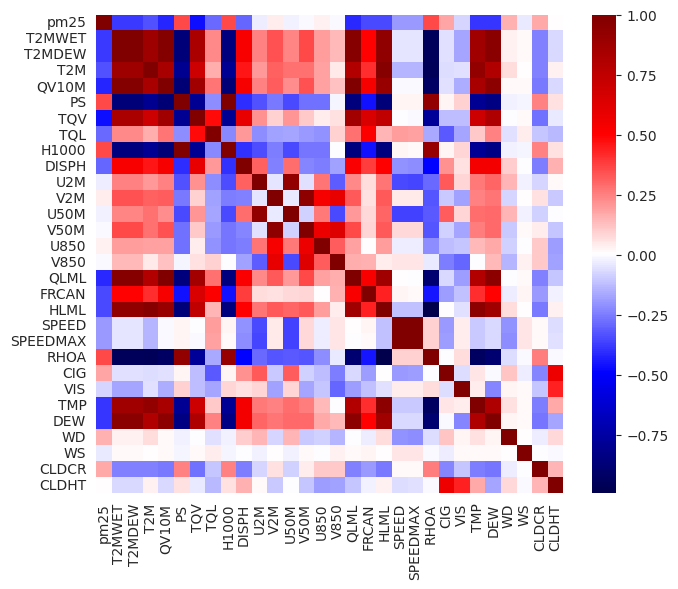

In [239]:
# we will do several steps to filter out dependent columns (well correlated with existing columns)
fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(df.corr(), cmap='seismic')
fig.tight_layout()
fig.savefig('img/2020Aug-corr-heatmap.png', dpi=120)

<Axes: >

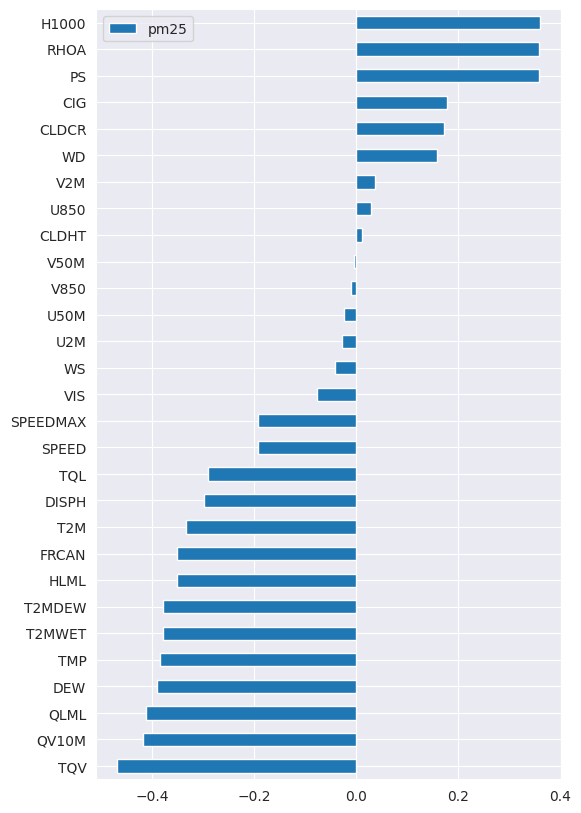

In [240]:
fig, ax = plt.subplots(figsize=(6,10))
df.corr()['pm25'].sort_values().to_frame().drop('pm25').plot.barh(ax=ax)

## let get wind speed data in different formats

In [241]:
# let detour and get wind in speed and direction (degree from 2.4 exercise)
dfw = pd.read_csv('data/merra2_hanoi_2018_wind_converted.csv', 
                  parse_dates=['Unnamed: 0'],
                 index_col=['Unnamed: 0'])
dfw.head()

,v_2m,d_2m,v_10m,d_10m,v_50m,d_50m,v_850,d_850,v_500,d_500,v_250,d_250
2018-01-01 00:00:00,0.507582,182.617815,0.820326,182.212835,1.167523,181.509485,6.347019,173.860069,11.257534,276.654649,23.196986,242.232266
2018-01-01 01:00:00,0.429060,206.227729,0.691324,206.109338,0.979452,205.692157,6.175777,176.297386,11.215821,280.471385,23.475563,241.081727
2018-01-01 02:00:00,0.383400,219.367919,0.617108,218.824390,0.872296,218.648565,5.997708,177.918171,10.827758,282.437516,23.842929,240.022727
2018-01-01 03:00:00,0.339189,215.109724,0.525337,212.637784,0.729687,211.709574,5.915825,177.896957,10.295540,282.633150,24.137831,239.375860
2018-01-01 04:00:00,0.305853,205.666509,0.477588,200.748694,0.666341,198.644717,5.885087,178.941354,9.500886,280.860531,24.453376,238.787131


In [242]:
dfw.columns

Index(['v_2m', 'd_2m', 'v_10m', 'd_10m', 'v_50m', 'd_50m', 'v_850', 'd_850',
       'v_500', 'd_500', 'v_250', 'd_250'],
      dtype='object')

In [243]:
cols = ['v_2m', 'd_2m', 'v_50m', 'd_50m', 'v_850', 'd_850']
dfw = dfw[cols]

In [244]:
# and combine all data in one place
df = pd.merge(df, dfw, right_index=True, left_index=True, how='left')

In [245]:
df.columns

Index(['pm25', 'T2MWET', 'T2MDEW', 'T2M', 'QV10M', 'PS', 'TQV', 'TQL', 'H1000',
       'DISPH', 'U2M', 'V2M', 'U50M', 'V50M', 'U850', 'V850', 'QLML', 'FRCAN',
       'HLML', 'SPEED', 'SPEEDMAX', 'RHOA', 'CIG', 'VIS', 'TMP', 'DEW', 'WD',
       'WS', 'CLDCR', 'CLDHT', 'v_2m', 'd_2m', 'v_50m', 'd_50m', 'v_850',
       'd_850'],
      dtype='object')

<Axes: >

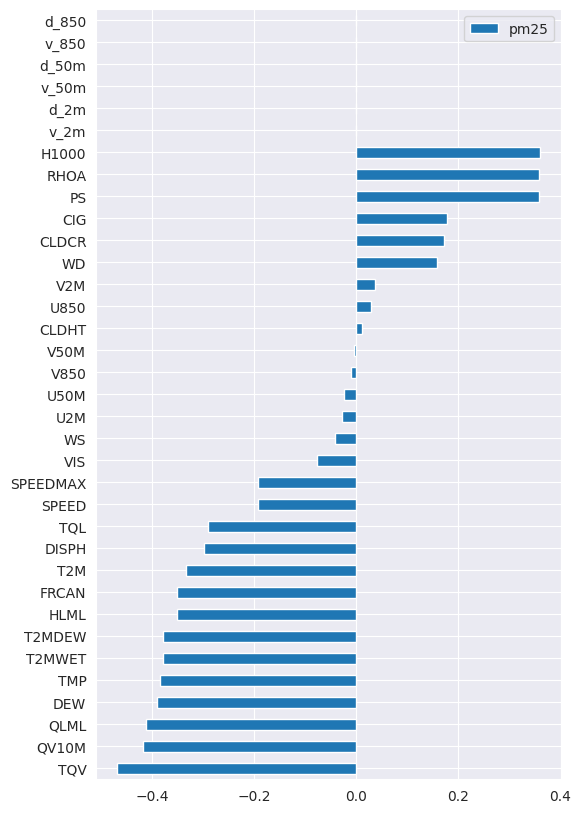

In [246]:
fig, ax = plt.subplots(figsize=(6,10))
df.corr()['pm25'].sort_values().to_frame().drop('pm25').plot.barh(ax=ax)

In [247]:
df.index.rename('DATE', inplace=True)

In [248]:
df.rename(columns={'pm25': 'PM2.5'}, inplace=True)

In [249]:
# save it, and we can use it later one (if needed)
df.to_csv('data/comb_PM25_Hanoi_2018.csv')

## Chart

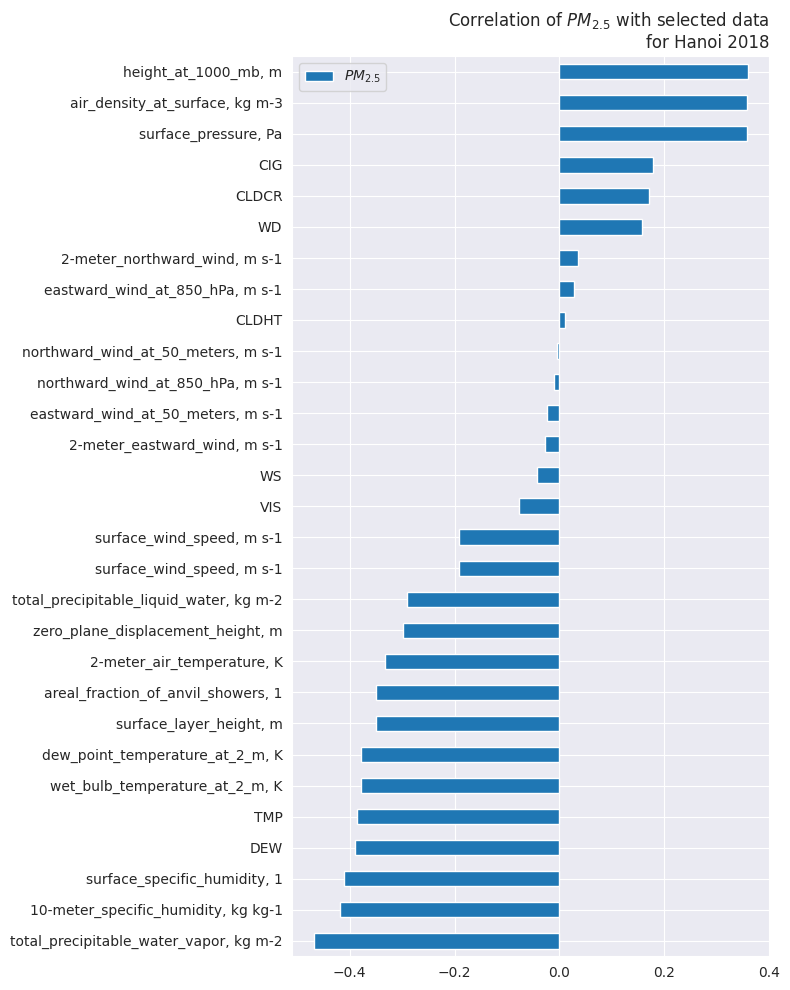

In [250]:
# and recreate the figure above with the standard name
# plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(8,10))
df.corr()['PM2.5'].sort_values().to_frame().dropna().drop('PM2.5').plot.barh(ax=ax)
ax.legend(['$PM_{2.5}$'], frameon=True)
labels = [item.get_text() for item in ax.get_yticklabels()]

# looking for a standard name for each abbreviation
new_label = dict()
for label in labels:
    if label in list(name_.keys()):
        new_label[label] = name_[label]
    else:
        new_label[label] = label
ax.set_yticklabels(new_label.values())
plt.title('Correlation of $PM_{2.5}$ with selected data\nfor Hanoi 2018', loc='right')
plt.tight_layout()

- too many, and some duplicated data, let define a list of columns to be dropped

In [251]:
df.drop(columns=['U2M', 'V2M', 'U50M', 'V50M', 'U850', 'V850'], inplace=True)

In [252]:
# save data as always
df.to_csv('data/comb_PM25_wind_Hanoi_2018.csv')

In [253]:
df.columns

Index(['PM2.5', 'T2MWET', 'T2MDEW', 'T2M', 'QV10M', 'PS', 'TQV', 'TQL',
       'H1000', 'DISPH', 'QLML', 'FRCAN', 'HLML', 'SPEED', 'SPEEDMAX', 'RHOA',
       'CIG', 'VIS', 'TMP', 'DEW', 'WD', 'WS', 'CLDCR', 'CLDHT', 'v_2m',
       'd_2m', 'v_50m', 'd_50m', 'v_850', 'd_850'],
      dtype='object')

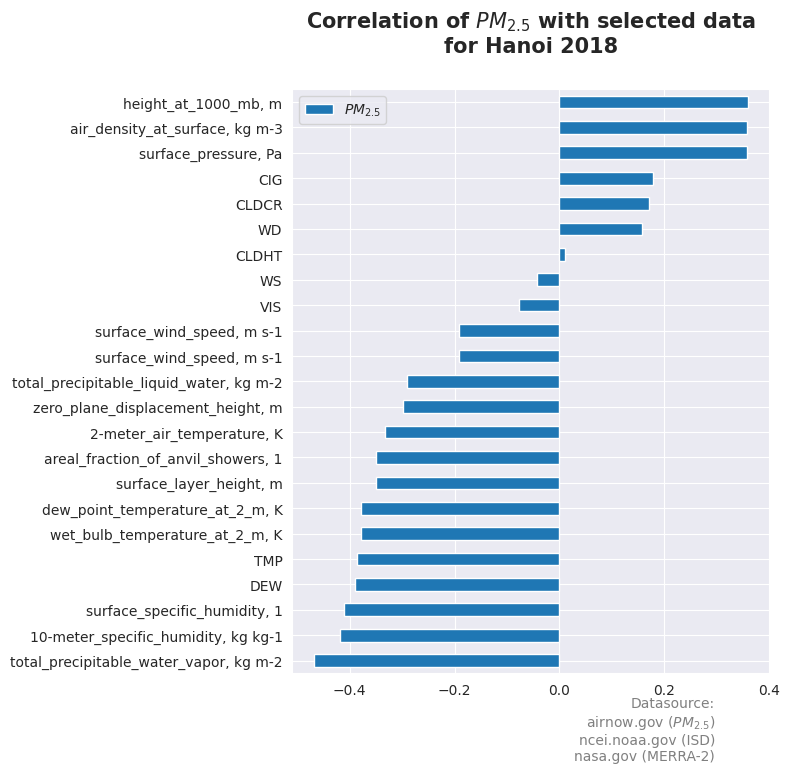

In [254]:
# and recreate the figure above with the standard name
fig, ax = plt.subplots(figsize=(8,8))
df.corr()['PM2.5'].sort_values().to_frame().dropna().drop('PM2.5').plot.barh(ax=ax)
ax.legend(['$PM_{2.5}$'], frameon=True)
labels = [item.get_text() for item in ax.get_yticklabels()]

# looking for a standard name for each abbreviation
new_label = dict()
for label in labels:
    if label in list(name_.keys()):
        new_label[label] = name_[label]
    else:
        new_label[label] = label
ax.set_yticklabels(new_label.values())
ax.set_title('Correlation of $PM_{2.5}$ with selected data\nfor Hanoi 2018', 
          y=1.05, fontsize=15, weight='bold')
fig.subplots_adjust(bottom=0.1)
fig.text(0.9,.04,s='Datasource:\n airnow.gov ($PM_{2.5}$)\nncei.noaa.gov (ISD)\nnasa.gov (MERRA-2)', 
         ha='right', color='gray')
plt.tight_layout(rect=(0, 0.1, 1,1))
# plt.tight_layout()
plt.savefig('img/2020Aug-PM25-allin.png', dpi=120)

<Axes: >

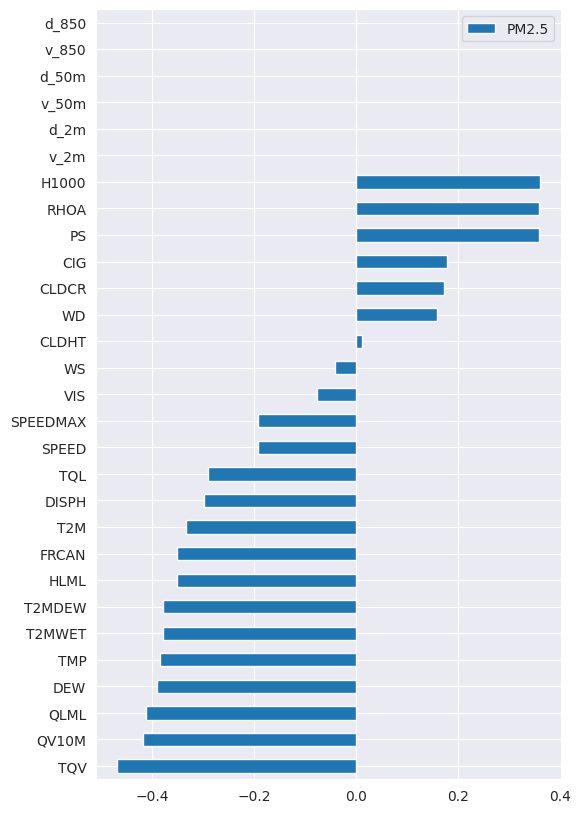

In [255]:
# less inputs
fig, ax = plt.subplots(figsize=(6,10))
df.corr()['PM2.5'].sort_values().to_frame().drop('PM2.5').plot.barh(ax=ax)

In [256]:
# some test to make sure we know they these are highly-dependent, 
df.corr()['T2M']['TMP']

np.float64(0.9262485548028176)

In [257]:
df.corr()['WS']['v_2m']

np.float64(nan)

In [258]:
# some cleaning
df.loc[df.WS>20, 'WS'] = None

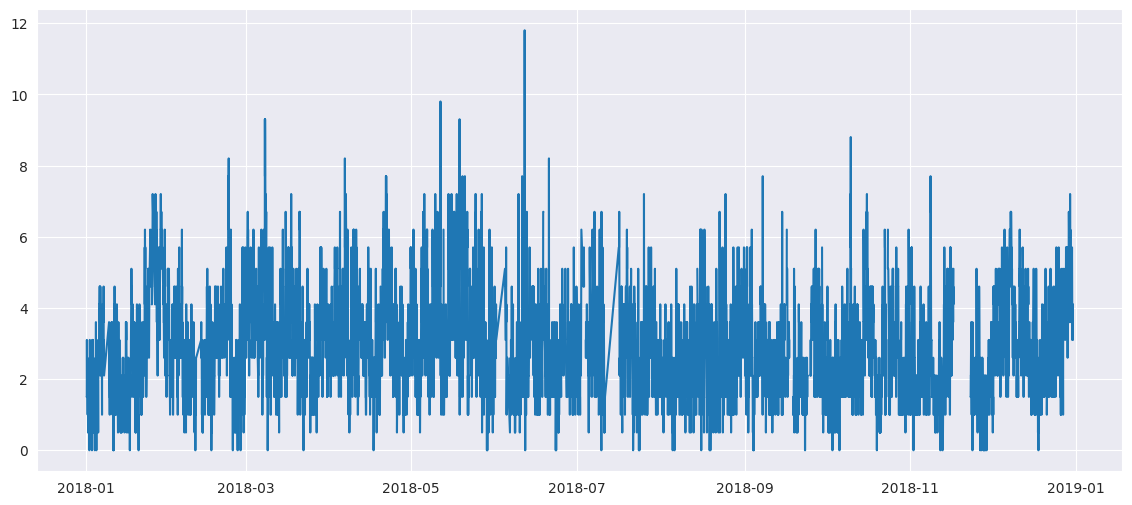

In [259]:
# not always as expected, one from observed station, another from a ground observed stations
plt.plot(df.index, df.WS)
plt.plot(df.index, df.v_2m)

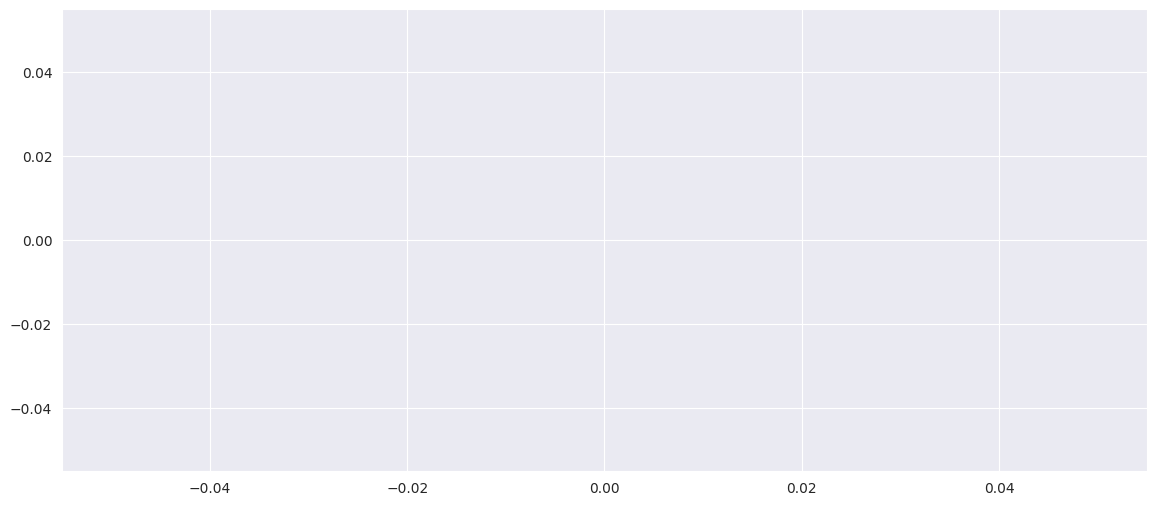

In [260]:
# ground station reported with coarse resolution, 0.5m/s increment
plt.scatter(df.WS, df.v_2m)

In [261]:
df.corr()['T2MDEW']['T2MWET']

np.float64(0.999999252066888)

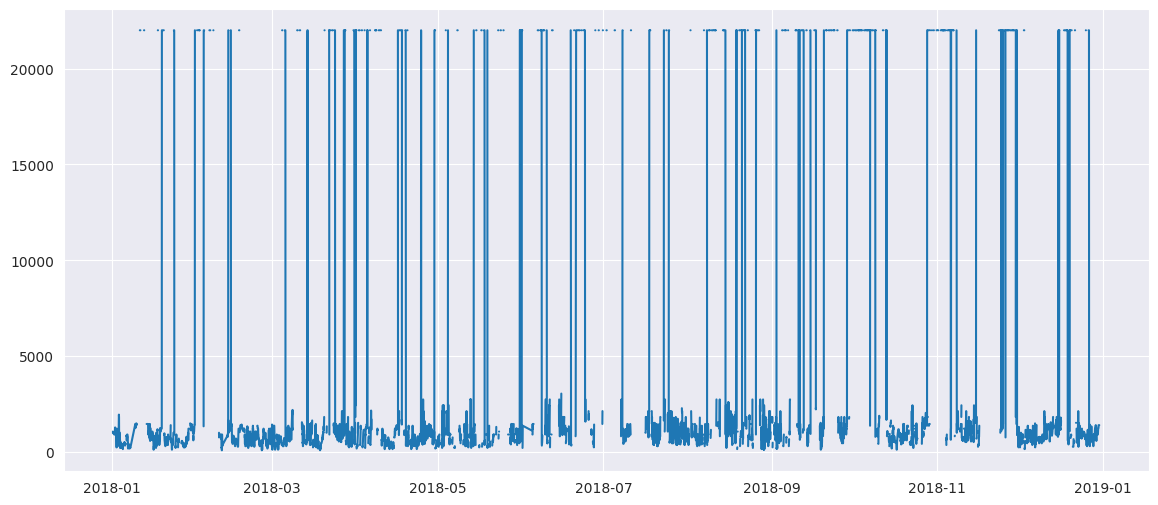

In [262]:
plt.plot(df.index, df.CIG)

In [263]:
df.corr()['SPEED'].sort_values()

DISPH      -0.211756
WD         -0.211602
PM2.5      -0.192395
CIG        -0.192119
T2M        -0.140154
HLML       -0.115054
TMP        -0.102803
DEW        -0.069703
CLDHT      -0.060311
T2MDEW     -0.047923
T2MWET     -0.047921
QV10M      -0.006900
TQV        -0.000806
QLML        0.004860
CLDCR       0.015283
FRCAN       0.019606
H1000       0.020673
PS          0.024060
VIS         0.038930
RHOA        0.094989
TQL         0.192514
WS          0.499856
SPEEDMAX    0.996841
SPEED       1.000000
v_2m             NaN
d_2m             NaN
v_50m            NaN
d_50m            NaN
v_850            NaN
d_850            NaN
Name: SPEED, dtype: float64

In [264]:
df.corr()['DEW']['T2MDEW']

np.float64(0.9566090636828989)

In [265]:
df.columns

Index(['PM2.5', 'T2MWET', 'T2MDEW', 'T2M', 'QV10M', 'PS', 'TQV', 'TQL',
       'H1000', 'DISPH', 'QLML', 'FRCAN', 'HLML', 'SPEED', 'SPEEDMAX', 'RHOA',
       'CIG', 'VIS', 'TMP', 'DEW', 'WD', 'WS', 'CLDCR', 'CLDHT', 'v_2m',
       'd_2m', 'v_50m', 'd_50m', 'v_850', 'd_850'],
      dtype='object')

In [266]:
cols_drop = ['T2MWET', 'SPEED', 'SPEEDMAX', 'DEW', 'TMP']

In [267]:
df.columns

Index(['PM2.5', 'T2MWET', 'T2MDEW', 'T2M', 'QV10M', 'PS', 'TQV', 'TQL',
       'H1000', 'DISPH', 'QLML', 'FRCAN', 'HLML', 'SPEED', 'SPEEDMAX', 'RHOA',
       'CIG', 'VIS', 'TMP', 'DEW', 'WD', 'WS', 'CLDCR', 'CLDHT', 'v_2m',
       'd_2m', 'v_50m', 'd_50m', 'v_850', 'd_850'],
      dtype='object')

In [268]:
df.drop(columns=cols_drop, inplace=True)

In [269]:
df.to_csv('data/comb_PM25_wind_Hanoi_2018_v1.csv')

<Axes: >

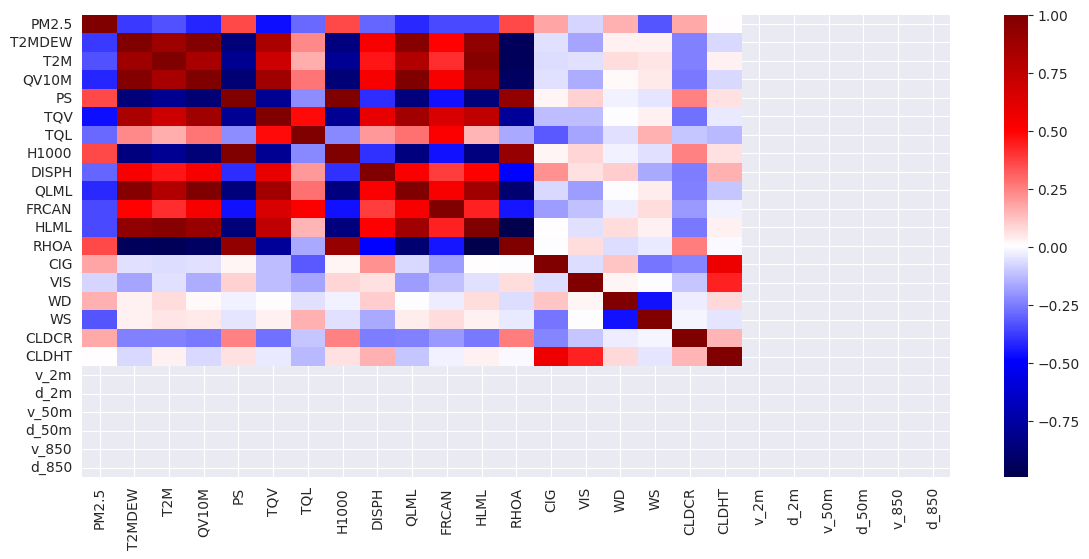

In [270]:
# let see how the heatmap again
sns.heatmap(df.corr(), cmap='seismic')

<Axes: >

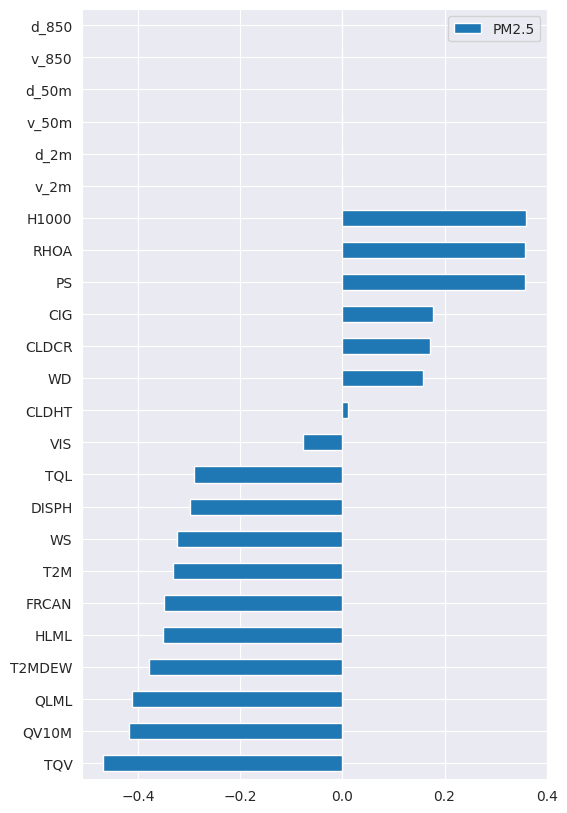

In [271]:
# and correlation only with PM2.5
fig, ax = plt.subplots(figsize=(6,10))
df.corr()['PM2.5'].sort_values().to_frame().drop('PM2.5').plot.barh(ax=ax)

In [272]:
colsd = ['QV10M', 'CLDHT', 'QLML']

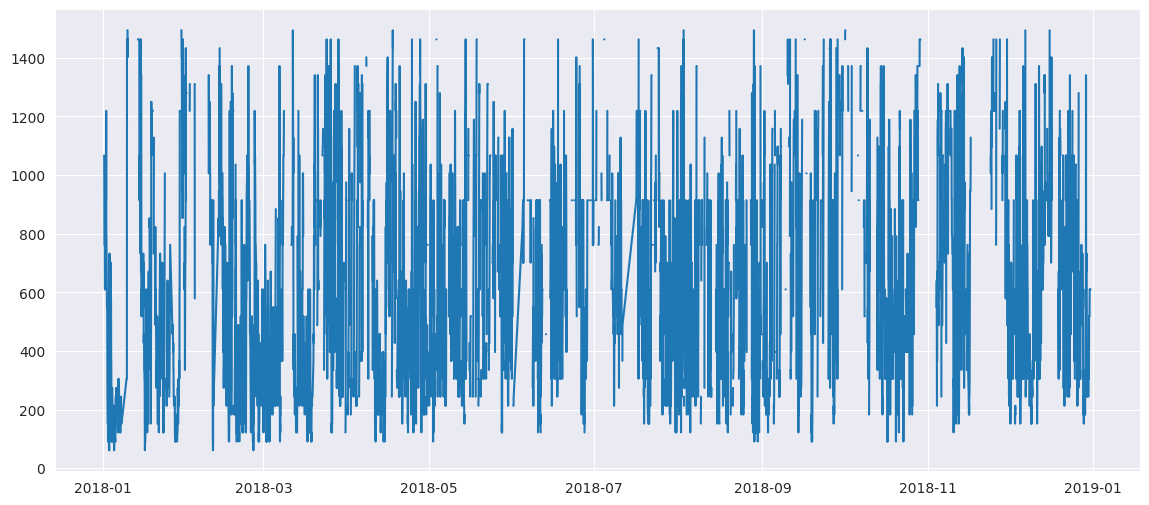

In [273]:
# Height to the lowest cloud is very weak, let see data before we drop it
plt.plot(df.index, df.CLDHT)

In [274]:
df.drop(columns=colsd, inplace=True)

<Axes: >

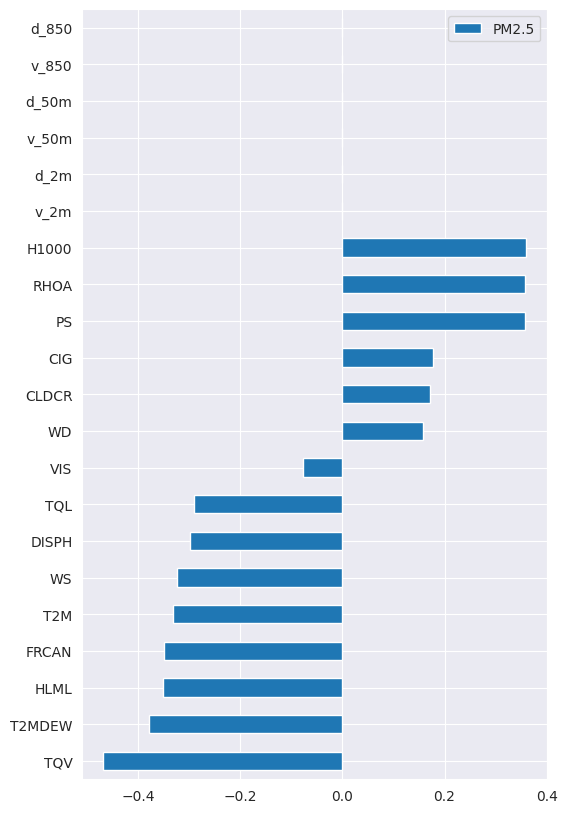

In [275]:
fig, ax = plt.subplots(figsize=(6,10))
df.corr()['PM2.5'].sort_values().to_frame().drop('PM2.5').plot.barh(ax=ax)

In [276]:
df.to_csv('data/comb_PM25_wind_Hanoi_2018_v2.csv')

In [277]:
more_cols = ['d_850', 'd_50m', 'd_2m', 'VIS', 'WD']

In [278]:
df.drop(columns=more_cols, inplace=True)

<Axes: >

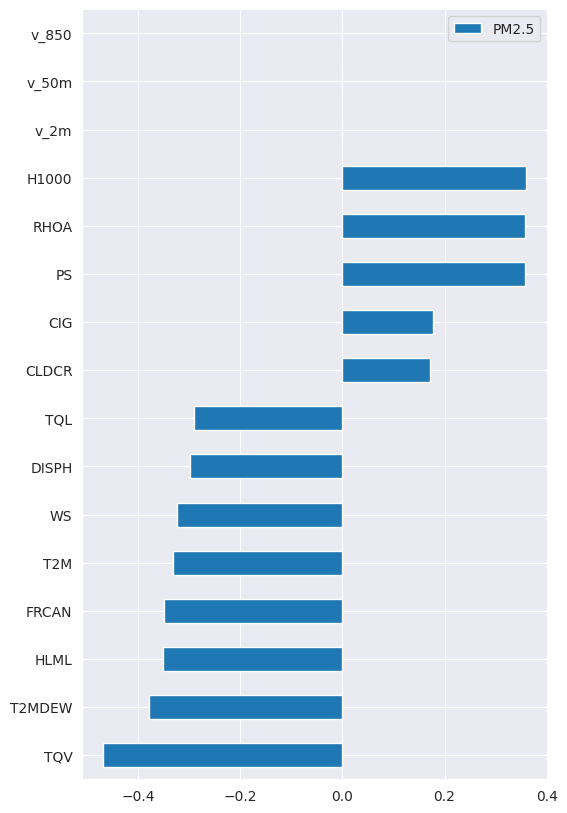

In [279]:
fig, ax = plt.subplots(figsize=(6,10))
df.corr()['PM2.5'].sort_values().to_frame().drop('PM2.5').plot.barh(ax=ax)

In [280]:
df['T2MDEW'] = df['T2MDEW'] - 273.15
df['T2M'] = df['T2M'] - 273.15

In [281]:
df.to_csv('data/comb_PM25_wind_Hanoi_2018_v3.csv')

In [282]:
df.describe()

,PM2.5,T2MDEW,T2M,PS,TQV,TQL,H1000,DISPH,FRCAN,HLML,RHOA,CIG,WS,CLDCR,v_2m,v_50m,v_850
count,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8116.000000,8092.000000,8092.000000,8092.000000,5088.000000,7809.000000,5502.000000,0.0,0.0,0.0
mean,40.758736,20.143231,23.209950,100091.307728,46.593698,0.078603,94.100740,0.283273,0.521452,66.146428,1.166763,4882.208137,2.852235,0.376863,NaN,NaN,NaN
std,31.501209,5.840456,6.123929,728.034422,15.289697,0.082412,63.071034,0.065183,0.374627,1.463402,0.033969,8266.805156,1.375927,0.190057,NaN,NaN,NaN
min,0.000000,-1.480020,2.569970,98338.780000,12.691939,0.000000,-62.420760,0.165833,0.000000,61.526400,1.101529,91.000000,0.000000,0.200000,NaN,NaN,NaN
25%,19.000000,17.237140,19.339165,99467.157500,34.854736,0.011534,39.747400,0.221359,0.148132,65.226177,1.139971,610.000000,2.100000,0.200000,NaN,NaN,NaN
50%,32.000000,21.767055,24.514350,100156.612500,46.939671,0.053711,101.305442,0.308167,0.511841,66.474025,1.161659,945.000000,2.600000,0.400000,NaN,NaN,NaN
75%,52.000000,24.810155,27.431088,100572.849000,60.093417,0.118324,137.084377,0.340698,0.931946,67.216239,1.187278,1494.000000,3.600000,0.400000,NaN,NaN,NaN
max,323.000000,27.994470,36.173800,102189.990000,79.528755,0.451294,266.238680,0.353638,1.000000,68.976160,1.276222,22000.000000,11.800000,0.800000,NaN,NaN,NaN


<Axes: >

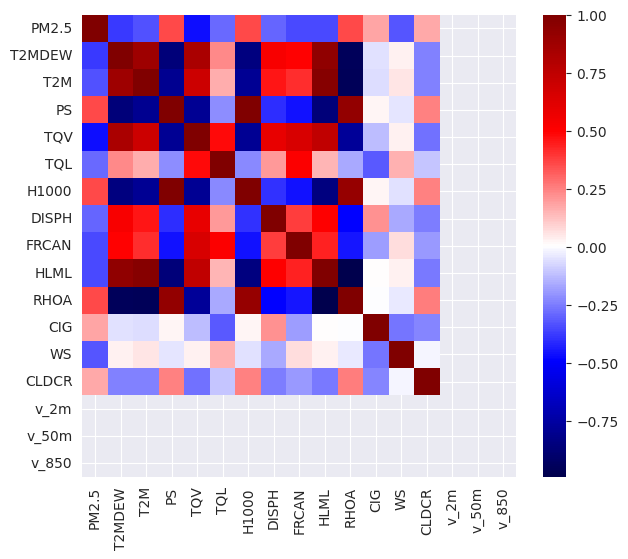

In [283]:
# much smaller dataset now
fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(df.corr(), cmap='seismic')

In [284]:
# let add name to nameplace holder, 
name_['CIG'] = 'ceiling height dimension, m'
name_['CLDCR'] = 'cloud cover, 1'
name_['v_2m'] = 'wind speed at 2m, m/s'
name_['v_50m'] = 'wind speed at 50m, m/s'
name_['v_850'] = 'wind speed at 850hPa (~1450m)'
name_['WS'] = 'observed ground wind speed, m/s'

# Nudgets are here!

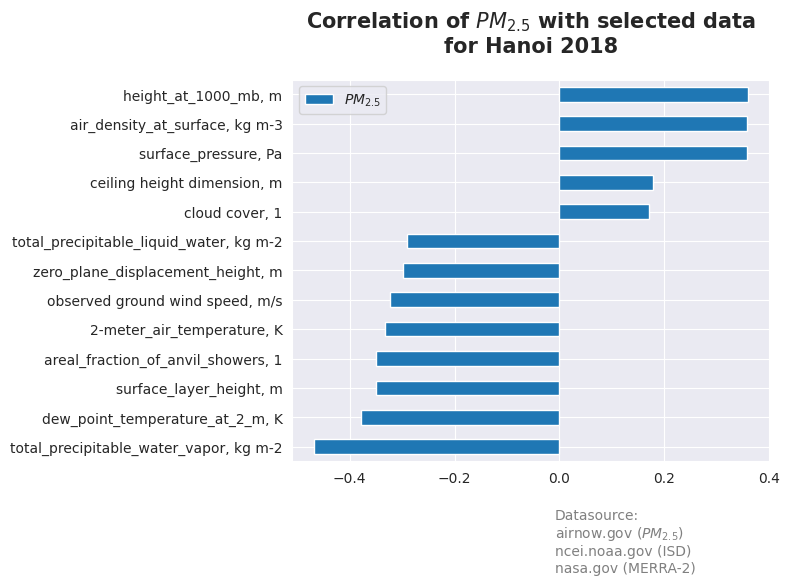

In [285]:
# and recreate the figure above with the standard name
fig, ax = plt.subplots(figsize=(8,6))
df.corr()['PM2.5'].sort_values().to_frame().dropna().drop('PM2.5').plot.barh(ax=ax)
ax.legend(['$PM_{2.5}$'], frameon=True)
labels = [item.get_text() for item in ax.get_yticklabels()]

# looking for a standard name for each abbreviation
new_label = dict()
for label in labels:
    if label in list(name_.keys()):
        new_label[label] = name_[label]
    else:
        new_label[label] = label
ax.set_yticklabels(new_label.values())
ax.set_title('Correlation of $PM_{2.5}$ with selected data\nfor Hanoi 2018', 
          y=1.05, fontsize=15, weight='bold')
fig.subplots_adjust(bottom=0.1)
fig.text(0.7,.03,s='Datasource:\nairnow.gov ($PM_{2.5}$)\nncei.noaa.gov (ISD)\nnasa.gov (MERRA-2)', 
         ha='left', color='gray')
plt.tight_layout(rect=(0, 0.15, 1,1))
# plt.tight_layout()
plt.savefig('img/2020Aug-PM25-selected.png', dpi=120)

- OK, now we are ready to rock some prediction

In [286]:
df.shape

(8116, 17)

In [287]:
new_label

{'TQV': 'total_precipitable_water_vapor, kg m-2',
 'T2MDEW': 'dew_point_temperature_at_2_m, K',
 'HLML': 'surface_layer_height, m',
 'FRCAN': 'areal_fraction_of_anvil_showers, 1',
 'T2M': '2-meter_air_temperature, K',
 'WS': 'observed ground wind speed, m/s',
 'DISPH': 'zero_plane_displacement_height, m',
 'TQL': 'total_precipitable_liquid_water, kg m-2',
 'CLDCR': 'cloud cover, 1',
 'CIG': 'ceiling height dimension, m',
 'PS': 'surface_pressure, Pa',
 'RHOA': 'air_density_at_surface, kg m-3',
 'H1000': 'height_at_1000_mb, m'}